In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Q1

In [137]:
def plot_degree(degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    Parameters
    ----------
    degree (np.ndarray or list):
        a vector of length N that corresponds to the degree, k_i, of every
        node, v_i, in the network

    number_of_bins (int):
        length of output vectors
    
    log_binning (bool)
        if you are plotting on a log-log axis, then this is useful
    
    base (int):
        log base, defaults to 2
        
    Returns
    -------
    x, y (np.ndarray):
        the support and probability values of the degree distribution
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

In [38]:
def plot_loglog_degree_distribution(G):
    degrees = dict(G.degree())
    degree_values = np.array(list(degrees.values()))

    # Calculate histogram values
    hist, bins = np.histogram(degree_values, bins=np.logspace(0, np.log10(max(degree_values)), 20))

    # Calculate bin centers
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Plot log-log degree distribution as a line plot
    plt.plot(bin_centers, hist, marker='o', linestyle='-', color='b')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Log-Log Degree Distribution')
    plt.xlabel('Degree (k)')
    plt.ylabel('Frequency')
    plt.show()

In [40]:
def plot_loglog_clustering_coefficient(G):
    clustering_coefficient = nx.clustering(G)
    degrees = dict(G.degree())
    degree_values = np.array(list(degrees.values()))
    clustering_values = np.array(list(clustering_coefficient.values()))

    # Plot log-log clustering coefficient vs degree
    plt.scatter(degree_values, clustering_values, alpha=0.7, color='r')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Log-Log Clustering Coefficient vs Degree')
    plt.xlabel('Degree (k)')
    plt.ylabel('Clustering Coefficient (C(k))')
    plt.show()

In [53]:
def plot_loglog_average_clustering(size_values, clustering_values):
    plt.plot(size_values, clustering_values, marker='o', linestyle='-', color='g')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Log-Log Average Clustering Coefficient vs Network Size')
    plt.xlabel('Network Size (N)')
    plt.ylabel('Average Clustering Coefficient')
    plt.show()

In [134]:
def Q1():
    U = nx.complete_graph(5)
    size_values = []
    size_values.append(nx.number_of_nodes(U))
    avg_clustering_store = []
    avg_clustering_store.append(nx.average_clustering(U))
    property_dict = {0:"periphery",1:"periphery",2:"periphery" ,3:"periphery" ,4:"center"}
    nx.set_node_attributes(U, property_dict, name = "labels")
    for j in range(5):
        G = U.copy()
        for i in range(4):
            U = nx.disjoint_union(U, G)
        center_node = 4
        for node in set(U.nodes()):
            if(node==center_node):
                # prevent self loop
                continue
            if(U.nodes[node]["labels"]=="center"):
                continue
            # check if edge exists
            if(U.has_edge(center_node, node)):
                continue
            else:
                if(U.nodes[node]["labels"]=="periphery"):
                    U.add_edge(node, center_node)
        # redefine center nodes
        for i in range(nx.number_of_nodes(U)//5):
            U.nodes[i]["labels"]="center"
        size_values.append(nx.number_of_nodes(U))
        avg_clustering_store.append(nx.average_clustering(U))
    return U, avg_clustering_store, size_values
U, avg_clustering_store, size_values = Q1()

In [135]:
max(set(U.nodes()))

15624

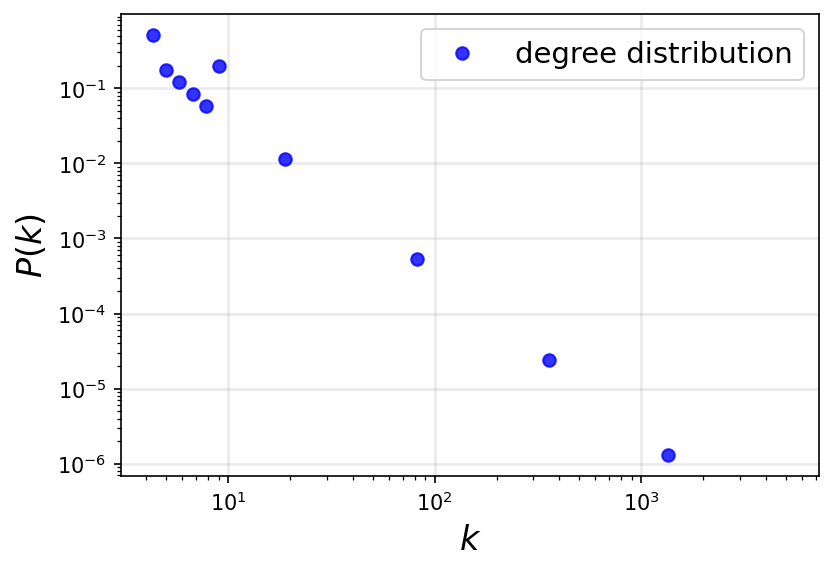

In [140]:
degrees = dict(U.degree())
x,y = plot_degree(np.array(list(degrees.values())))
fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x, y,'o', color='blue', label='degree distribution', alpha=0.8)


ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)
ax.legend(fontsize=14)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

#plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
#plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

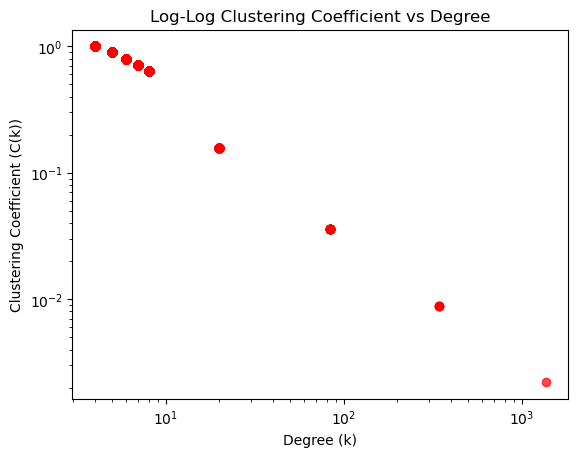

In [132]:
plot_loglog_clustering_coefficient(U)

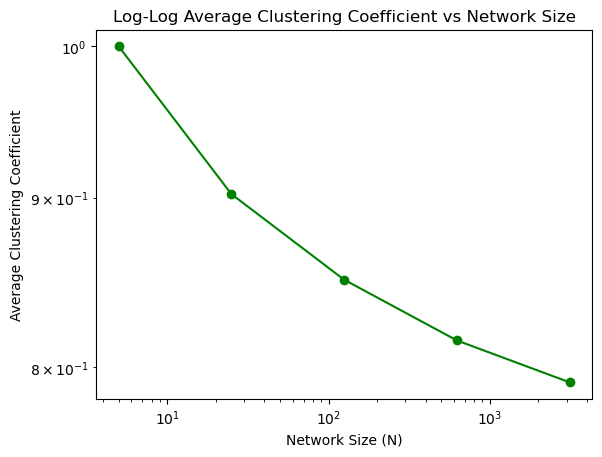

In [133]:
plot_loglog_average_clustering(size_values, avg_clustering_store)

In [ ]:
# U = nx.complete_graph(5)
# property_list = ["periphery", "periphery", "periphery", "periphery", "center"]
# avg_clustering_store = []
# size_values = []
# size_values.append(nx.number_of_nodes(U))
# avg_clustering_store.append(nx.average_clustering(U))
# for j in range(5):
#     for i in range(4):
#         U = nx.disjoint_union(U, G)
#     center_node = 0
#     for node in set(U.nodes()):
#         if(node==center_node):
#             # prevent self loop
#             continue
#         if((node+1)%5==0):
#             continue
#         # check if edge exists
#         if(U.has_edge(center_node, node)):
#             continue
#         else:
#             U.add_edge(node, center_node)
#     G = U.copy()
#     avg_clustering_store.append(nx.average_clustering(U))
#     size_values.append(nx.number_of_nodes(U))

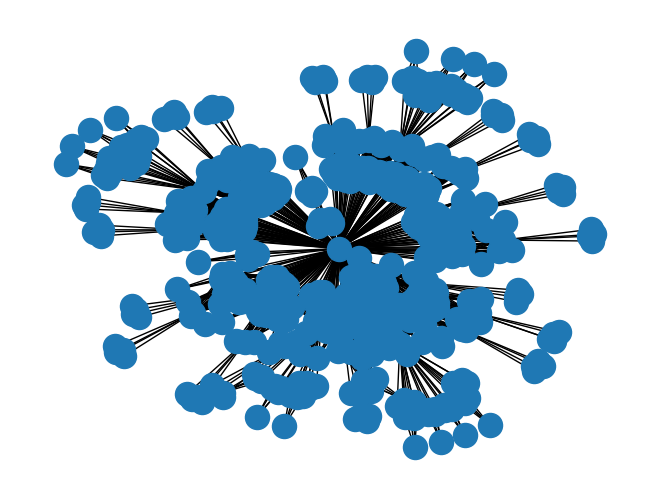

In [103]:
# U = nx.complete_graph(5)
# property_dict = {0:"periphery",1:"periphery",2:"periphery" ,3:"periphery" ,4:"center"}
# nx.set_node_attributes(U, property_dict, name = "labels")
# for j in range(3):
#     G = U.copy()
#     for i in range(4):
#         U = nx.disjoint_union(U, G)
#     center_node = 4
#     for node in set(U.nodes()):
#         if(node==center_node):
#             # prevent self loop
#             continue
#         if(U.nodes[node]["labels"]=="center"):
#             continue
#         # check if edge exists
#         if(U.has_edge(center_node, node)):
#             continue
#         else:
#             if(U.nodes[node]["labels"]=="periphery"):
#                 U.add_edge(node, center_node)
#     # redefine center nodes
#     for i in range(nx.number_of_nodes(U)//5):
#         U.nodes[i]["labels"]="center"
# nx.draw(U)

In [104]:
nx.number_of_nodes(U)

625

In [100]:
U.nodes[27]["labels"]

'center'

In [94]:
U.edges(27)

EdgeDataView([(27, 25), (27, 26), (27, 28), (27, 29)])

In [102]:
U.edges(29)

EdgeDataView([(29, 25), (29, 26), (29, 27), (29, 28), (29, 30), (29, 31), (29, 32), (29, 33), (29, 35), (29, 36), (29, 37), (29, 38), (29, 40), (29, 41), (29, 42), (29, 43), (29, 45), (29, 46), (29, 47), (29, 48)])

In [101]:
U.edges(25)

EdgeDataView([(25, 26), (25, 27), (25, 28), (25, 29)])

In [106]:
U.nodes[141]["labels"]

'center'

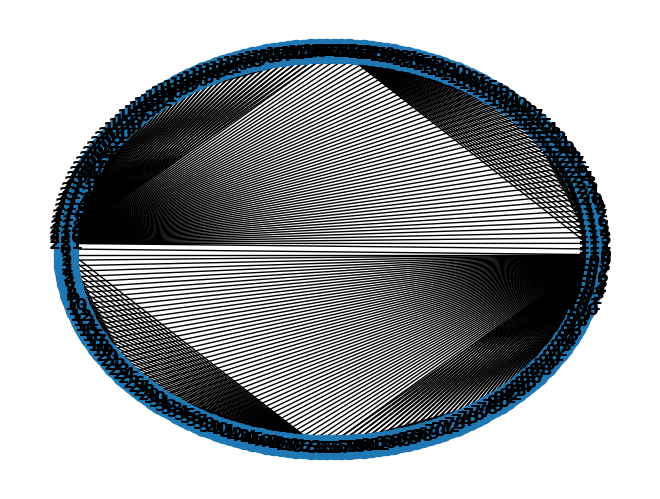

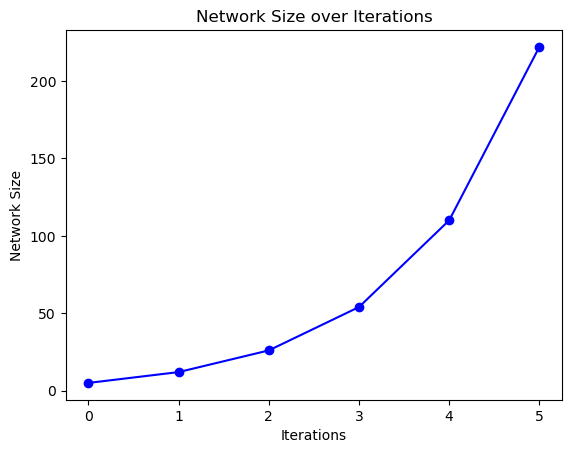

In [125]:

# # Function to construct the hierarchical network iteratively
# def hierarchical_network_construction(iterations):
#     G = nx.complete_graph(5)

#     sizes = [5]
#     for _ in range(iterations):
#         new_nodes = set(G.nodes())
#         new_center = max(G.nodes()) + 1

#         # Connect peripheral nodes to the new center
#         for node in new_nodes:
#             G.add_edge(node, new_center)

#         # Create replicas of the network at the previous step
#         G = nx.disjoint_union(G, nx.relabel_nodes(G, lambda x: x + max(G.nodes()) + 1))

#         sizes.append(len(G.nodes()))

#         if len(G.nodes()) >= 15625:
#             break

#     return G, sizes

# # Example: Construct the hierarchical network with iterations
# iterations = 5  # You can adjust this value based on your requirement
# hierarchical_network_graph, network_sizes = hierarchical_network_construction(iterations)

# # Plot the hierarchical network
# pos = nx.shell_layout(hierarchical_network_graph)
# nx.draw(hierarchical_network_graph, pos, with_labels=True, font_weight='bold')
# plt.show()

# # Plot the network sizes over iterations
# plt.plot(network_sizes, marker='o', linestyle='-', color='b')
# plt.title('Network Size over Iterations')
# plt.xlabel('Iterations')
# plt.ylabel('Network Size')
# plt.show()


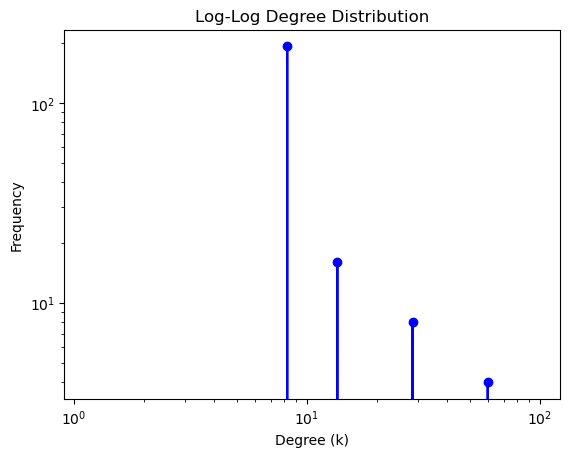

In [127]:
plot_loglog_degree_distribution(hierarchical_network_graph)

## Q4

In [146]:
def expression(n, m):
    return m**4 - 2*m**3 + m**2*(n-5) + m*(n-4) + 6

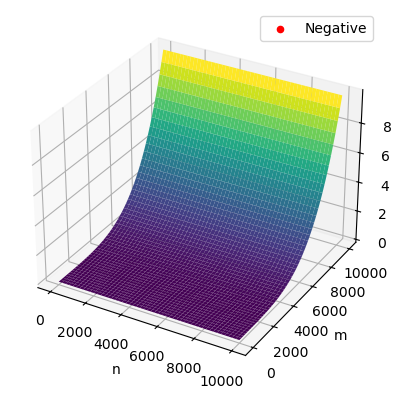

In [151]:
 # Generate values for n and m
n_values = np.linspace(0, 10000, 1000)  # Adjust the range and number of points as needed
m_values = np.linspace(0, 10000, 1000)

# Create a meshgrid for n and m
n_mesh, m_mesh = np.meshgrid(n_values, m_values)

# Evaluate the expression for each combination of n and m
result = expression(n_mesh, m_mesh)

# Identify regions where the expression value becomes negative
negative_mask = result < 0

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(n_mesh, m_mesh, result, cmap='viridis')

# Mark regions where the expression value is negative
ax.scatter(n_mesh[negative_mask], m_mesh[negative_mask], result[negative_mask], color='red', marker='o', label='Negative')

# Set labels
ax.set_xlabel('n')
ax.set_ylabel('m')
ax.set_zlabel('Expression Value')

# Add a legend
ax.legend()

# Show the plot
plt.show()

## Q2

In [157]:
U, avg_clustering_store, size_values = Q1()

In [158]:
largest_cc = max(nx.connected_components(U), key=len)

size_of_largest_cc = len(largest_cc)

In [168]:
del size_of_largest_cc

In [190]:
def clustering_attack(G):
    original_num_nodes = G.number_of_nodes()
    # Initialize a list to store the sizes of the largest connected component at each iteration
    sizes_of_largest_cc = []

    # Perform the attack iterations
    while G.number_of_nodes() > 0:

        # Find the largest clustering nodes (randomly choose one if there are ties)
        max_clustering_coeff = max(nx.clustering(G).values())
        node_to_remove= None
        for node, coeff in nx.clustering(G).items():
            if(coeff == max_clustering_coeff):
                node_to_remove = node
                break    
        if(node is None):
            print("ERROR!! No largest coefficient node found")
            break
        # Remove the chosen node
        G.remove_node(node_to_remove)
        
        if(G.number_of_nodes()>0):
        # Compute the size of the largest connected component
            largest_cc_size = len(max(nx.connected_components(G), key=len))
        
        # Store the size for plotting
        sizes_of_largest_cc.append(largest_cc_size/original_num_nodes)
        if G.number_of_nodes() % 100 == 0:
            print(f"Remaining nodes: {G.number_of_nodes()}")
    return sizes_of_largest_cc

In [185]:
def degree_attack(G):
    original_num_nodes = G.number_of_nodes()
    # Initialize a list to store the sizes of the largest connected component at each iteration
    sizes_of_largest_cc = []

    # Perform the attack iterations
    while G.number_of_nodes() > 0:

        # Find the largest degree nodes (randomly choose one if there are ties)
        max_degree = max(dict(G.degree()).values())
        node_to_remove= None
        for node, degree in G.degree():
            if(degree == max_degree):
                node_to_remove = node
                break    
        if(node is None):
            print("ERROR!! No largest degree node found")
            break
        # Remove the chosen node
        G.remove_node(node_to_remove)
        
        if(G.number_of_nodes()>0):
        # Compute the size of the largest connected component
            largest_cc_size = len(max(nx.connected_components(G), key=len))
        
        # Store the size for plotting
        sizes_of_largest_cc.append(largest_cc_size/original_num_nodes)
        if G.number_of_nodes() % 100 == 0:
            print(f"Remaining nodes: {G.number_of_nodes()}")
    return sizes_of_largest_cc

Remaining nodes: 15600
Remaining nodes: 15500
Remaining nodes: 15400
Remaining nodes: 15300
Remaining nodes: 15200
Remaining nodes: 15100
Remaining nodes: 15000
Remaining nodes: 14900
Remaining nodes: 14800
Remaining nodes: 14700
Remaining nodes: 14600
Remaining nodes: 14500
Remaining nodes: 14400
Remaining nodes: 14300
Remaining nodes: 14200
Remaining nodes: 14100
Remaining nodes: 14000
Remaining nodes: 13900
Remaining nodes: 13800
Remaining nodes: 13700
Remaining nodes: 13600
Remaining nodes: 13500
Remaining nodes: 13400
Remaining nodes: 13300
Remaining nodes: 13200
Remaining nodes: 13100
Remaining nodes: 13000
Remaining nodes: 12900
Remaining nodes: 12800
Remaining nodes: 12700
Remaining nodes: 12600
Remaining nodes: 12500
Remaining nodes: 12400
Remaining nodes: 12300
Remaining nodes: 12200
Remaining nodes: 12100
Remaining nodes: 12000
Remaining nodes: 11900
Remaining nodes: 11800
Remaining nodes: 11700
Remaining nodes: 11600
Remaining nodes: 11500
Remaining nodes: 11400
Remaining n

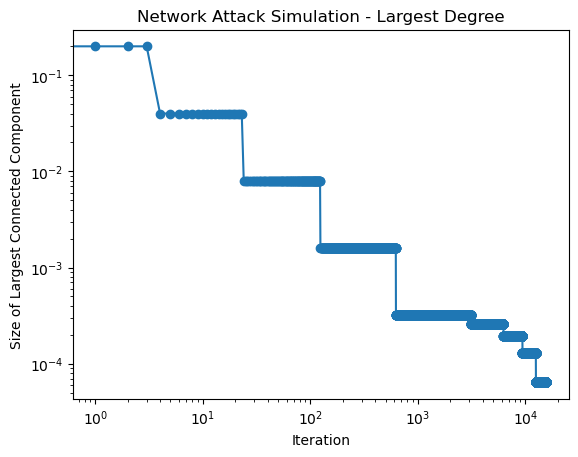

In [191]:
G = U.copy()

sizes_of_largest_cc_degree = degree_attack(G)

#Plot the sizes of the largest connected component over iterations
plt.loglog(sizes_of_largest_cc_degree, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Connected Component')
plt.title('Network Attack Simulation - Largest Degree')
plt.show()


In [217]:
G = U.copy()
original_num_nodes = G.number_of_nodes()
# Initialize a list to store the sizes of the largest connected component at each iteration
sizes_of_largest_cc = []
clustering_coeff_dict = nx.clustering(G)
# Perform the attack iterations
while G.number_of_nodes() > 0:

    # Find the largest clustering nodes (randomly choose one if there are ties)
    max_clustering_coeff = max(clustering_coeff_dict.values())
    node_to_remove= None
    for node, coeff in clustering_coeff_dict.items():
        if(coeff == max_clustering_coeff):
            node_to_remove = node
            #print(node)
            break    
    if(node is None):
        print("ERROR!! No largest coefficient node found")
        break
    # store all nodes with edges to node to be removed
    edge_list = list(G.edges(node_to_remove))
    connected_nodes = [v for k,v in edge_list]
    # Remove the chosen node
    G.remove_node(node_to_remove)
    if(G.number_of_nodes()>0):
    # Compute the size of the largest connected component
        largest_cc_size = len(max(nx.connected_components(G), key=len))
    
    # Store the size for plotting
    sizes_of_largest_cc.append(largest_cc_size/original_num_nodes)
    if G.number_of_nodes() % 100 == 0:
        print(f"Remaining nodes: {G.number_of_nodes()}")
    # update clustering coeff dict
    update_dict = nx.clustering(G, nodes=connected_nodes)
    #print("updating")
    for k,v in update_dict.items():
        #print(update_dict[k])
        clustering_coeff_dict[k] = update_dict[k]
    del clustering_coeff_dict[node_to_remove]

Remaining nodes: 15600
Remaining nodes: 15500
Remaining nodes: 15400
Remaining nodes: 15300
Remaining nodes: 15200
Remaining nodes: 15100
Remaining nodes: 15000
Remaining nodes: 14900
Remaining nodes: 14800
Remaining nodes: 14700
Remaining nodes: 14600
Remaining nodes: 14500
Remaining nodes: 14400
Remaining nodes: 14300
Remaining nodes: 14200
Remaining nodes: 14100


KeyboardInterrupt: 

In [192]:
G = U.copy()

sizes_of_largest_cc_coeff = clustering_attack(G)

#Plot the sizes of the largest connected component over iterations
plt.loglog(sizes_of_largest_cc_coeff, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Size of Largest Connected Component')
plt.title('Network Attack Simulation - Largest Coeff')
plt.show()


Remaining nodes: 15600


KeyboardInterrupt: 

In [184]:
# x,y = plot_degree(sizes_of_largest_cc)
# fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

# ax.loglog(x, y,'o', color='blue', label='size of gcc: degree attack', alpha=0.8)


# ax.set_xlabel(r"$k$", fontsize=16)
# ax.set_ylabel(r"$P(k)$", fontsize=16)
# ax.legend(fontsize=14)

# ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

# #plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
# #plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
# plt.show()

ValueError: `bins` must increase monotonically, when an array

In [171]:
clustering_values = np.array(list(nx.clustering(U).values()))

In [173]:
clustering_values.shape

(15625,)

In [183]:
len(sizes_of_largest_cc)

15625

In [199]:
temp = list(U.edges(0))

In [201]:
temp_val = [v for k,v in temp]

In [202]:
temp_val

[1, 2, 3, 4]

In [204]:
update_dict = nx.clustering(U, nodes=temp_val)

In [205]:
original = nx.clustering(U)
for k,v in update_dict.items():
    original[k] = update_dict[k]

In [211]:
G = nx.path_graph(3)

In [212]:
G.remove_node(0)

In [215]:
G.edges(0)

NetworkXError: nbunch is not a node or a sequence of nodes.

### other configuration model

In [ ]:
N = 15625
gamma = 2.5

# Generate power-law degree sequence
degree_sequence = np.random.pareto(gamma, N).astype(int) + 1  # Adding 1 to avoid zero degrees

# Ensure the sum of degrees is even (required for configuration_model)
while sum(degree_sequence) % 2 != 0:
    degree_sequence = np.random.pareto(gamma, N).astype(int) + 1

# Create the graph using configuration model
G = nx.configuration_model(degree_sequence)

# Extract the graph from the configuration model
G = nx.Graph(G)